In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('merged_dataframe.csv')

In [17]:
#data_personality = pd.DataFrame()
#data_personality = data[["total_funding_usd","num_funding_rounds","openness","conscientiousness","extraversion","agreeableness","neuroticism"]]

In [18]:

### DOING THIS AT FIRST GIVES US 8 SAMPLE####
#data = data.dropna()

### Test 1

In [3]:
data_cols_1 = ["total_funding_usd","openness","conscientiousness","extraversion","agreeableness","neuroticism"]

In [4]:
data_1 = data[data_cols_1]

In [5]:
data_1 = data_1.dropna()

In [6]:
len(data_1)

2770

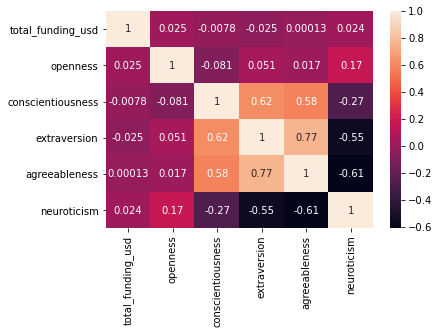

In [10]:
correlation_mat = data_1.corr()
sns.heatmap(correlation_mat, annot = True)
plt.savefig('r_exp_1.png')
plt.show()

In [9]:
plt.savefig('r_exp_1.png')

<Figure size 432x288 with 0 Axes>

In [29]:
scaler = MinMaxScaler()

In [30]:
scaled_data_1 = scaler.fit_transform(data_1)
scaled_data_1 = pd.DataFrame(scaled_data_1, columns=data_cols_1)

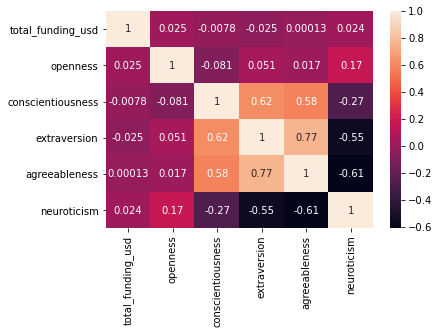

In [33]:
correlation_mat = scaled_data_1.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

### Test 2

In [13]:
data_cols_2 = ["num_funding_rounds","openness","conscientiousness","extraversion","agreeableness","neuroticism"]

In [14]:
data_2 = pd.DataFrame()

In [15]:
def categorize_value(x):
    if x == '101-250':
        return 175
    elif x == '501-1000':
        return 750
    elif x == '1001-5000':
        return 2500
    elif x == '11-50':
        return 30
    elif x == '251-500':
        return 375
    else:
        return None

In [16]:
data['avg_employee'] = data['employee_count'].apply(categorize_value)

In [17]:
data_2['avg_funding'] = data['total_funding_usd'] / data['avg_employee']

In [18]:
data_2[data_cols_2] = data[data_cols_2]

In [19]:
data_2 = data_2.dropna()

In [20]:
len(data_2)

1875

In [21]:
data_2

,avg_funding,num_funding_rounds,openness,conscientiousness,extraversion,agreeableness,neuroticism
0,1.812800e+05,13.0,63.370382,25.464822,37.577109,36.705432,53.540692
1,5.962800e+05,7.0,37.613179,55.368255,57.353612,60.636094,33.727562
4,3.756333e+05,6.0,61.438531,45.906696,55.835480,56.377701,37.711411
5,2.183333e+06,6.0,57.940572,49.437346,66.784381,50.531789,29.779803
6,1.226667e+06,5.0,46.354435,54.406083,46.550605,47.146438,35.414298
...,...,...,...,...,...,...,...
6089,9.666667e+05,2.0,43.832489,57.970097,54.154497,50.354973,45.855861
6090,9.666667e+05,2.0,50.983784,48.895575,57.237882,43.482513,39.404582
6092,1.666667e+04,1.0,43.140119,46.748814,61.343827,55.335276,26.660633
6110,4.408110e+05,2.0,46.351828,63.280264,56.098571,53.910453,39.499864


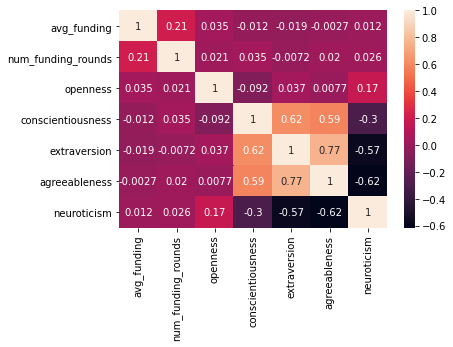

In [22]:
correlation_mat = data_2.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

### Test 3

In [23]:
data_3 = pd.DataFrame()

In [24]:
data_3['avg_fund_per_round'] = data_2['avg_funding'] / data_2['num_funding_rounds']

In [25]:
data_3_cols = ["openness","conscientiousness","extraversion","agreeableness","neuroticism"]

In [26]:
data_3[data_3_cols] = data_2[data_3_cols]

In [27]:
data_3 = data_3.dropna()

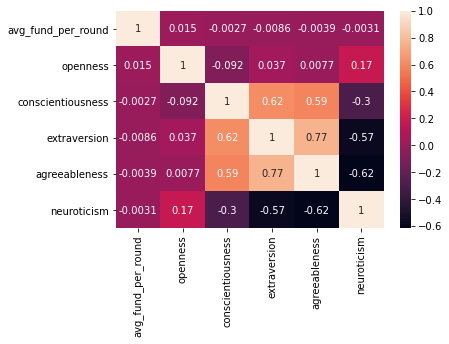

In [28]:
correlation_mat = data_3.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [29]:
data['employee_count']

0       1001-5000
1         101-250
2          10000+
3            1-10
4        501-1000
          ...    
6125         1-10
6126         1-10
6127      unknown
6128      unknown
6129         1-10
Name: employee_count, Length: 6130, dtype: object

### test 4
#### All together

In [30]:
data_4 = pd.DataFrame()

In [31]:
data_4["avg_valuation_price"] = data["valuation_price"]/data['avg_employee']

In [32]:
data_4['avg_funding'] = data_2['avg_funding']

In [33]:
data_4['avg_fund_per_round'] = data_3['avg_fund_per_round']

In [34]:
data_4[data_1.columns] = data_1

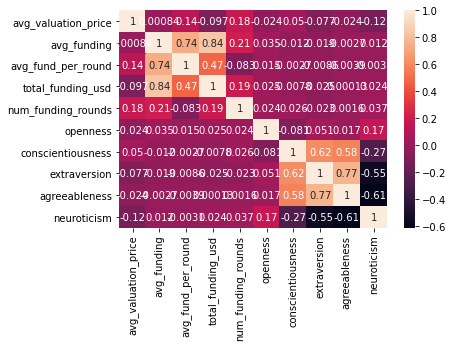

In [35]:
correlation_mat = data_4.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [32]:
scaled_data_1['total_funding_usd'].std()

0.027745118349434862

(array([2.309e+03, 2.000e+02, 8.500e+01, 5.900e+01, 4.000e+01, 1.900e+01,
        3.000e+00, 8.000e+00, 1.000e+01, 8.000e+00, 4.000e+00, 0.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

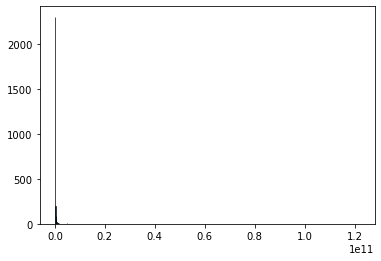

In [14]:
plt.hist(data_1['total_funding_usd'], bins=1000, edgecolor='black', alpha=0.7)